In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
# 데이터를 train과 test로 나눔
# num_words : 데이터에서 등장 빈도 순위로 몇번째에 해당하는 단어까지만 사용할 것인지를 조절
# test_split=0.2 : 전체 데이터 중 20%를 test 데이터로 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

C:\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
print('train 뉴스 기사의 개수 : {}'.format(len(x_train)))
print('test 뉴스 기사의 개수 : {}'.format(len(x_test)))
num_classes = max(y_train) + 1
print('카테고리의 수 : {}'.format(num_classes))

train 뉴스 기사의 개수 : 8982
test 뉴스 기사의 개수 : 2246
카테고리의 수 : 46


In [ ]:
print(x_train[0]) # 첫번째 train 뉴스 기사
print()
print(y_train[0]) # 첫번째 train 뉴스 기사의 레이블

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]

3


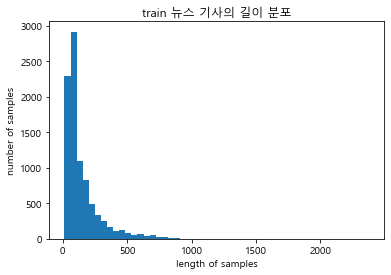

In [ ]:
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.title('train 뉴스 기사의 길이 분포')
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'레이블 값의 분포'}, ylabel='count'>

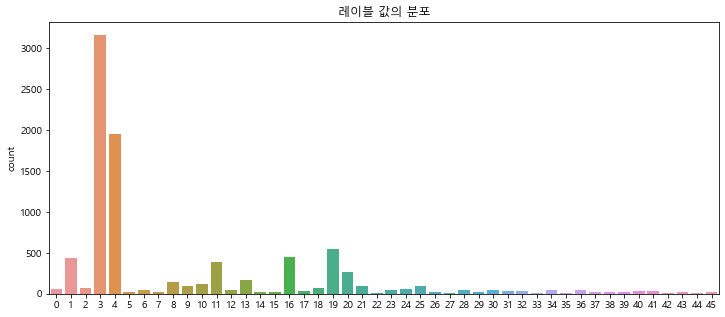

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
plt.title('레이블 값의 분포') # 어떤 종류의 뉴스에 속하는가
sns.countplot(y_train)

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수 : ")
#print(np.asarray((unique_elements, counts_elements)))
label_cnt=dict(zip(unique_elements, counts_elements))
print(label_cnt)

각 레이블에 대한 빈도수 : 
{0: 55, 1: 432, 2: 74, 3: 3159, 4: 1949, 5: 17, 6: 48, 7: 16, 8: 139, 9: 101, 10: 124, 11: 390, 12: 49, 13: 172, 14: 26, 15: 20, 16: 444, 17: 39, 18: 66, 19: 549, 20: 269, 21: 100, 22: 15, 23: 41, 24: 62, 25: 92, 26: 24, 27: 15, 28: 48, 29: 19, 30: 45, 31: 39, 32: 32, 33: 11, 34: 50, 35: 10, 36: 49, 37: 19, 38: 19, 39: 24, 40: 36, 41: 30, 42: 13, 43: 21, 44: 12, 45: 18}


## lstm으로 로이터 뉴스 분류하기

In [2]:
#from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from numpy import argmax

In [3]:
# 등장빈도 순서가 가장 많은 상위 1000개의 단어만 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(8982,)
(8982,)
(2246,)


In [4]:
# 뉴스 기사의 길이(단어의 수)를 일치시킴
x_train = pad_sequences(x_train, maxlen=100) # train 뉴스 기사 패딩
x_test = pad_sequences(x_test, maxlen=100) # test 뉴스 기사 패딩

In [5]:
# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# train과 validation 분리
val_n = round(len(x_train)*0.3)

x_val = x_train[:val_n] # train의 30%를 validation으로 사용
x_train = x_train[val_n:]
y_val = y_train[:val_n] # train의 30%를 validation으로 사용
y_train = y_train[val_n:]

In [7]:
y_train.shape[0]

6287

In [ ]:
model = Sequential()
model.add(Embedding(1000, 120)) # 120개의 차원을 가지는 1000개의 임베딩 벡터 생성
model.add(LSTM(120)) # 샘플을 lstm에 넣음
model.add(Dense(46, activation='softmax'))

Embedding() 함수는 최소 2개의 매개변수를 필요로 함<br>
Embedding(입력 크기, 출력 크기)<br>
Embedding('불러온 단어의 총 개수', '기사당 단어 수') 형식  
위에서 단어 상위1000개를 추출하였으므로 입력크기가 1000

In [ ]:
#검증 데이터 손실(val_loss) 4회 증가 -> 학습 조기 종료
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
#검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델 저장
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, callbacks=[es, mc], validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 2.6304 - acc: 0.3498
Epoch 00001: val_acc improved from -inf to 0.34471, saving model to best_model.h5
63/63 [==============================] - 12s 193ms/step - loss: 2.6304 - acc: 0.3498 - val_loss: 2.4334 - val_acc: 0.3447
Epoch 2/20
63/63 [==============================] - ETA: 0s - loss: 2.3903 - acc: 0.3580
Epoch 00002: val_acc improved from 0.34471 to 0.42115, saving model to best_model.h5
63/63 [==============================] - 11s 178ms/step - loss: 2.3903 - acc: 0.3580 - val_loss: 2.2761 - val_acc: 0.4212
Epoch 3/20
63/63 [==============================] - ETA: 0s - loss: 2.0580 - acc: 0.4897
Epoch 00003: val_acc did not improve from 0.42115
63/63 [==============================] - 11s 175ms/step - loss: 2.0580 - acc: 0.4897 - val_loss: 2.3625 - val_acc: 0.4007
Epoch 4/20
63/63 [==============================] - ETA: 0s - loss: 2.0345 - acc: 0.4818
Epoch 00004: val_acc improved from 0.42115 to 0.50649, saving

In [ ]:
print("\n 테스트 정확도 : %.4f" % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 2s 27ms/step - loss: 1.3518 - acc: 0.6736

 테스트 정확도 : 0.6736


In [ ]:
# 모델 사용결과
xhat_idx = np.random.choice(x_test.shape[0], 15)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat) # predict는 실수, predict_clases는 정수로 값이 나옴

num=0
for i in range(15):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))
    if str(argmax(y_test[xhat_idx[i]])) == str(yhat[i]):
        num+=1

print("15개 중 모델이 일치한 것의 개수 : ", num)

True : 20, Predict : 20
True : 3, Predict : 8
True : 3, Predict : 3
True : 20, Predict : 20
True : 19, Predict : 19
True : 3, Predict : 3
True : 3, Predict : 3
True : 34, Predict : 34
True : 4, Predict : 4
True : 19, Predict : 11
True : 3, Predict : 4
True : 10, Predict : 11
True : 3, Predict : 3
True : 3, Predict : 3
True : 24, Predict : 1
15개 중 모델이 일치한 것의 개수 :  10


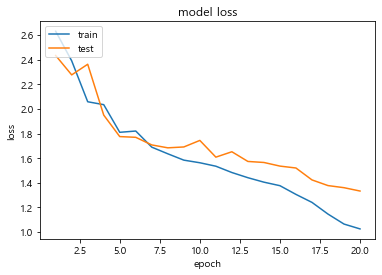

In [ ]:
# epoch마다 변화하는 train data와 test data의 손실 시각화
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 모델 저장
model.save("reuter_model.h5") # 모델을 hdf5 파일에 저장<br>
<font color=blue>hdf5 파일 : HDF(Hierarchical Data Format) Group에 의해 관리되고 있눈 대용량의 데이터를 저장하기 위한 파일 형식</font>  

### 모델 불러오기
from tensorflow.keras.models import load_model  
model = load_model("reuter_model.h5")  

## 텍스트로 디코딩하기
숫자로 전처리 되어있는 데이터를 다시 영어로 복구

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

#0,1,2는 '패딩','문서시작','사전에 없음'음 위한 인덱스이므로 3을 뺸다.
decoded_news = ' '.join([reverse_word_index.get(i-3, '?') for i in x_train[0]])

In [ ]:
decoded_news[:]

"of england said it had given the money market a further ? mln stg ? in the ? ? this ? the bank's total help so far today to ? mln stg and ? with its estimate of a ? of some ? mln stg in the system which it earlier revised up from 400 mln the central bank ? bank bills ? ? 80 mln stg in ? one at 9 7 8 pct eight mln stg in ? two at 9 13 16 pct and 95 mln stg in ? three at 9 3 4 pct reuter 3"

In [ ]:
x_train[0]

array([  5, 794,   8,  16,  64, 630,   4, 239,  76,  10, 226,   2,  11,
       167,   2,   7,   4,   2,   2,  52,   2,   4, 797, 135, 444, 345,
       550, 145,   6,   2,  11, 167,   9,   2,  31,  25, 862,   5,  10,
         2,   5, 126,   2,  11, 167,   7,   4, 298,  50,  16, 157, 553,
        84,  22, 628,  11,   4, 204,  60,   2,  60, 723,   2,   2, 401,
        11, 167,   7,   2,  68,  28,  72,  61,  63,  20, 353,  11, 167,
         7,   2,  78,  28,  72, 165, 158,  20,   9, 767,  11, 167,   7,
         2, 109,  28,  72,  12,  47,  20,  17,  12])